<a href="https://colab.research.google.com/github/brugalbryan/Artificial-Intelligence/blob/main/Simple_Linear_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np  # scientific computation
import pandas as pd  # data handling
import matplotlib.pyplot as plt  # plotting
# The following "magic command" allows figures to be displayed automatically in notebook
%matplotlib inline  

In [ ]:
raw_data = pd.read_csv("average-height-of-men-for-selected-countries.csv", sep=',')
raw_data.head()
data = raw_data[raw_data['Entity'] == "United Kingdom"]
data.head()

# Extract USA data since 1900.
filter2 = (data["Year"] >= 1900)
data = data[filter2]
data

,Entity,Code,Year,Human Height (University of Tuebingen (2015))
1185,United Kingdom,GBR,1900,169.4
1186,United Kingdom,GBR,1910,170.9
1187,United Kingdom,GBR,1920,171.0
1188,United Kingdom,GBR,1930,173.9
1189,United Kingdom,GBR,1940,174.9
1190,United Kingdom,GBR,1950,176.0
1191,United Kingdom,GBR,1960,176.9
1192,United Kingdom,GBR,1970,177.1
1193,United Kingdom,GBR,1980,176.8


In [ ]:
data = data.set_index(["Year"])
data.head()

data.drop(["Entity", 'Code'], axis=1, inplace=True) 

data = data.rename(columns={'Human Height (University of Tuebingen (2015))': "Height(cm)"})
data

,Height(cm)
Year,
1900,169.4
1910,170.9
1920,171.0
1930,173.9
1940,174.9
1950,176.0
1960,176.9
1970,177.1
1980,176.8


In [ ]:
#Calculate the average increase per year between 1900 and 1980
#slope of the line connecting these two points?
# find the value of b so that point
roc = []
for year in data.index:
  if year == 1900:
    continue
  else:
    before = year - 10
    height = data.loc[year, 'Height(cm)'] - \
    data.loc[before, 'Height(cm)']
    rate = (height / 10)
    roc.append(rate)

# Getting values of M and B for modeling
m = np.mean(roc)
b = data.loc[1900, 'Height(cm)'] - m * 1900

print("Slope:", m, "\nY-Intercept:",b)


Slope: 0.09250000000000008 
Y-Intercept: -6.350000000000136


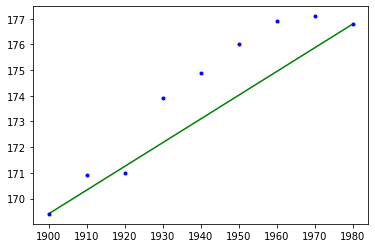

In [ ]:
xCoord = np.linspace(1900, 1980, 100)
yCoord = m * xCoord + b
years = data.index
heights = data['Height(cm)']
plt.plot(xCoord, yCoord, 'g-')
plt.plot(years, heights, 'b.')

In [ ]:
# Calculate errors for each year

# all the years are contained in data.index 

errors = []

for year in data.index:
    # Calculate the squared error for that year
    x = year
    y = data.loc[x, 'Height(cm)']
    prediction = m * x + b
    error = (prediction - y) ** 2

    # append the error to the errors list
    errors.append(error)

# Now you should have a list of errors.
print("Errors for each year:\n", errors)

Errors for each year:
 [0.0, 0.3306249999999869, 0.06250000000001421, 2.9756249999999804, 3.2399999999999385, 3.9006249999998652, 3.802499999999956, 1.5006249999999164, 8.077935669463161e-28]


In [ ]:
# Calculate the mean squared error, use np.mean() function
mse = np.mean(errors)
print("The mean squared error is: {:0.6f}.\n".format(mse))

The mean squared error is: 1.756944.

